# **IMAGE CLASSIFICATION** ***(COFFEE FRUITS)***

**Import Library**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt
import os, random, pathlib, warnings, itertools, math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, Dropout
from tensorflow.keras.metrics import categorical_crossentropy

**Hubungkan ke Dataset di Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset='/content/drive/MyDrive/Dataset'

train_folder = os.path.join(dataset,'Training')
validation_folder = os.path.join(dataset,'Validation')

**Split 80% Training and 20% Validation Dataset**

In [6]:
#Training
def count_files(rootdir):
  for path in pathlib.Path(rootdir).iterdir():
    if path.is_dir():
      print("Terdapat " + str(len([name for name in os.listdir(path)\
      if os.path.isfile(os.path.join(path,name))])) + " Image Training Untuk Label " + \
      str(path.name))
  
count_files(os.path.join(train_folder))

Terdapat 120 Image Training Untuk Label SetengahMatang
Terdapat 160 Image Training Untuk Label Matang
Terdapat 120 Image Training Untuk Label Mentah


In [7]:
#Validation
def count_files(rootdir):
  for path in pathlib.Path(rootdir).iterdir():
    if path.is_dir():
      print("Terdapat " + str(len([name for name in os.listdir(path)\
      if os.path.isfile(os.path.join(path,name))])) + " Image Validation Untuk Label " + \
      str(path.name))
  
count_files(os.path.join(validation_folder))

Terdapat 30 Image Validation Untuk Label SetengahMatang
Terdapat 40 Image Validation Untuk Label Matang
Terdapat 30 Image Validation Untuk Label Mentah


**Visualisasi Dataset**

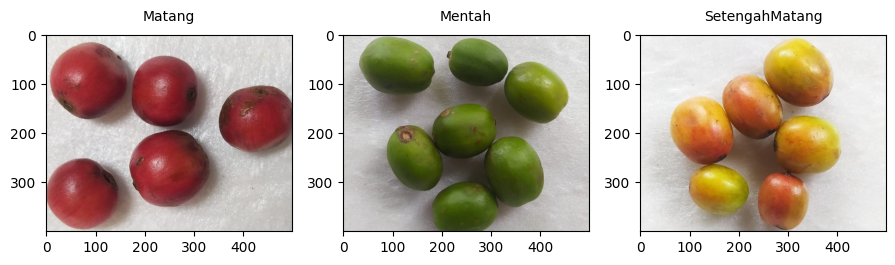

In [15]:
images = []

for label_folder in sorted(os.listdir(train_folder)):
    label_items = os.listdir(train_folder + '/' + label_folder)
    label_selected = np.random.choice(label_items)
    images.append(os.path.join(train_folder, label_folder, label_selected))

fig=plt.figure(1, figsize=(15, 10))

for subplot, image_ in enumerate(images):
  category=image_.split('/')[-2]
  imgs = plt.imread(image_)
  a,b,c=imgs.shape
  fig=plt.subplot(3, 5, subplot+1)
  fig.set_title(category, pad = 10, size=10)
  plt.imshow(imgs)

plt.tight_layout()

**ImageAugmentation Dataset**


In [16]:
train_datagen = ImageDataGenerator(
                rescale = 1./225,
                rotation_range = 30,
                horizontal_flip = True,
                vertical_flip=True,
                shear_range = 0.3,
                fill_mode ='nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./225,
                rotation_range = 30,
                horizontal_flip = True,
                vertical_flip=True,
                shear_range = 0.3,
                fill_mode ='nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size =(224,224),
    color_mode = 'rgb',
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_folder,
    target_size =(224,224),
    color_mode = 'rgb',
    batch_size = 10,
    class_mode = 'categorical'
)

Found 400 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


**Create Convolutional neural network Model**

In [18]:
model_coffee = tf.keras.models.Sequential([
#Convolution layer    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

 #Fully Connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
model_coffee.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

In [31]:
#tampilkan semua layer
for i, layer in enumerate(model_coffee.layers):
    print(i, layer.name)

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 flatten
5 dropout
6 dense
7 dense_1


In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print('\nAkurasi sudah mencapai 99%')
      self.model.stop_training = True

callbacks =myCallback()

In [21]:
model_coffee.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history_coffee = model_coffee.fit(train_generator,
                            steps_per_epoch=15,
                            epochs=10, 
                            validation_data = val_generator, 
                            verbose = 1,
                            callbacks = [callbacks]
)

Epoch 1/10
15/15 [==============================] - 63s 4s/step - loss: 6.8262 - accuracy: 0.4733 - val_loss: 0.4562 - val_accuracy: 0.8300
Epoch 2/10
15/15 [==============================] - 48s 3s/step - loss: 0.3535 - accuracy: 0.8533 - val_loss: 0.1786 - val_accuracy: 0.9300
Epoch 3/10
15/15 [==============================] - 46s 3s/step - loss: 0.2574 - accuracy: 0.8933 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 46s 3s/step - loss: 0.1052 - accuracy: 0.9800 - val_loss: 0.0288 - val_accuracy: 0.9900
Epoch 5/10
15/15 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9933
Akurasi sudah mencapai 99%
15/15 [==============================] - 45s 3s/step - loss: 0.0265 - accuracy: 0.9933 - val_loss: 0.0175 - val_accuracy: 1.0000


**Visualisasi Plot Model CNN**

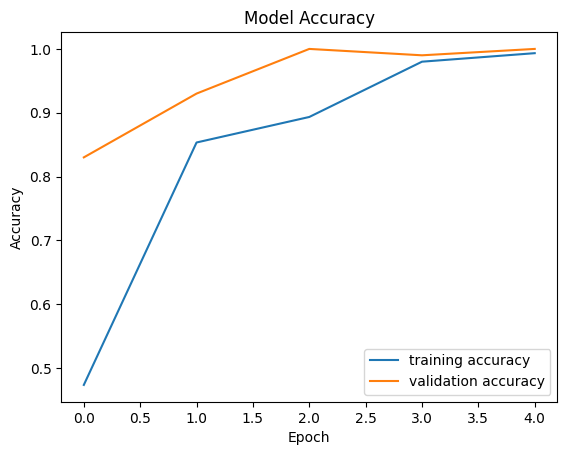

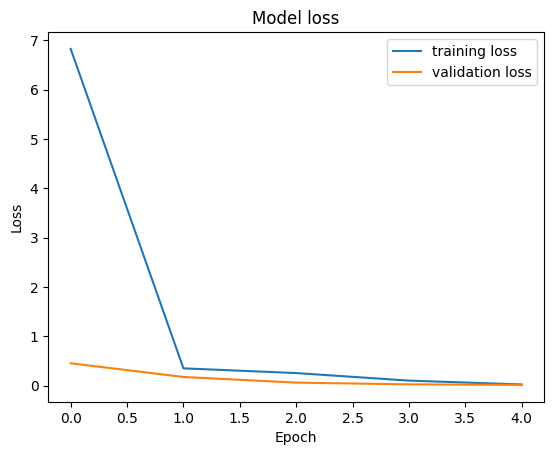

In [24]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label='validation accuracy')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(loc='best')
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'], label="training loss")
  plt.plot(history.history['val_loss'], label='validation loss')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='best')
  plt.show()
  
plot_accuracy(history_coffee)
plot_loss(history_coffee)

In [25]:
valid_loss, valid_accuracy = model_coffee.evaluate(val_generator)

10/10 [==============================] - 5s 472ms/step - loss: 0.0456 - accuracy: 0.9900


In [26]:
print("Accuracy model CNN: {}".format(valid_accuracy))

Accuracy model CNN: 0.9900000095367432


**Prediksi Image**

Saving test 1.jpeg to test 1.jpeg
1/1 [==============================] - 0s 199ms/step
test 1.jpeg
Matang


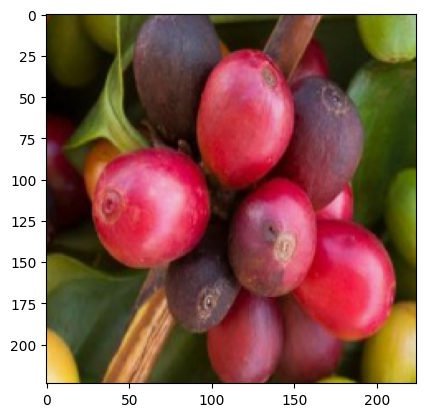

In [27]:
#Prediksi gambar baru
from google.colab import files
from keras.preprocessing import image
import keras.utils as image

# Kriteria : Dapat memprediksi gambar yang diunggah ke Colab
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  gambar = image.load_img(path, target_size =(224,224))
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)

  gambar_prediksi = np.vstack([x])
  classes = model_coffee.predict(gambar_prediksi, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Matang')
  elif classes[0,1]!=0:
    print('Mentah')
  else:
    print('Setengah Matang')

**Save Model h5**

In [28]:
#Simpan model akhir
model_coffee.save("model_DCoffee_Classification.h5")
tf.keras.models.save_model(model_coffee,'model_DCoffee_Classification.hdf5')

**Save Model Json**

In [32]:
model_DCoffee_json = model_coffee.to_json()
with open("model_Dcoffee_Classification_json", "w") as file_json:
    file_json.write(model_DCoffee_json)

**Convert to TFLite**

In [29]:
import tensorflow as tf
#Load model h5
model_DCoffee = tf.keras.models.load_model(filepath="model_DCoffee_Classification.h5")

#Convert model h5
konversi = tf.lite.TFLiteConverter.from_keras_model(model_DCoffee)
model_tflite = konversi.convert()

#Simpan model yang sudah diconvert
with tf.io.gfile.GFile('model_DCoffee_Classification.tflite', 'wb') as f:
  f.write(model_tflite)